# 분석에 필요한 파생컬럼 생성 및 테이블 조인

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

art = pd.read_csv("data.backup/articles_processed.csv")            # 상품 메타데이터
cust = pd.read_csv("data.backup/customer_processed.csv")           # 고객 메타데이터
total_revenue = pd.read_csv("data.backup/total_revenue.csv")       # 매출 데이터

# 안전하게 날짜형 변환
total_revenue["t_dat"] = pd.to_datetime(total_revenue["t_dat"])

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# articles_processed 데이터

In [ ]:
# ----------------------------------------------------
# 상품 메타데이터
# 상품군 / 색상 / 톤 / 카테고리별 매출 분석의 기반
# 상위 20%, 하위 20% 고객이 어떤 상품군을 소비할까?, 접근한 상품 특성이 무었일까?
# 거래데이터와 조인 해보기
# ----------------------------------------------------
art.info()

<class 'pandas.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   article_id                    105542 non-null  int64
 1   product_code                  105542 non-null  int64
 2   prod_name                     105542 non-null  str  
 3   product_type_info             105542 non-null  str  
 4   product_group_name            105542 non-null  str  
 5   graphical_appearance_info     105542 non-null  str  
 6   perceived_colour_master_info  105542 non-null  str  
 7   department_info               105542 non-null  str  
 8   index_info                    105542 non-null  str  
 9   index_group_info              105542 non-null  str  
 10  section_info                  105542 non-null  str  
 11  garment_group_info            105542 non-null  str  
dtypes: int64(2), str(10)
memory usage: 9.7 MB


In [ ]:
art.shape

(105542, 12)

In [ ]:
art.head()

,article_id,product_code,prod_name,product_type_info,product_group_name,graphical_appearance_info,perceived_colour_master_info,department_info,index_info,index_group_info,section_info,garment_group_info
0,108775015,108775,Strap top,Vest top (253),Garment Upper body,Solid (1010016),Black (5),Jersey Basic (1676),Ladieswear (A),Ladieswear (1),Womens Everyday Basics (16),Jersey Basic (1002)
1,108775044,108775,Strap top,Vest top (253),Garment Upper body,Solid (1010016),White (9),Jersey Basic (1676),Ladieswear (A),Ladieswear (1),Womens Everyday Basics (16),Jersey Basic (1002)
2,108775051,108775,Strap top (1),Vest top (253),Garment Upper body,Stripe (1010017),White (9),Jersey Basic (1676),Ladieswear (A),Ladieswear (1),Womens Everyday Basics (16),Jersey Basic (1002)
3,110065001,110065,OP T-shirt (Idro),Bra (306),Underwear,Solid (1010016),Black (5),Clean Lingerie (1339),Lingeries/Tights (B),Ladieswear (1),Womens Lingerie (61),"Under-, Nightwear (1017)"
4,110065002,110065,OP T-shirt (Idro),Bra (306),Underwear,Solid (1010016),White (9),Clean Lingerie (1339),Lingeries/Tights (B),Ladieswear (1),Womens Lingerie (61),"Under-, Nightwear (1017)"


In [ ]:
na_a = art.isna().sum().sort_values(ascending=False) 
na_a.head(3)

article_id      0
product_code    0
prod_name       0
dtype: int64

크기: 105,542행 × 17열<br>
키값:키: article_id<br>
결측/중복: 존재 X<br>

- article_id              : 개별 상품을 식별하는 고유 ID
- product_code            : 동일한 디자인·모델을 묶는 상품 그룹 코드
- prod_name               : 상품 이름
- product_type_info       : 상품 유형을 나타내는 메타데이터
- product_group_name      : 상품 분류 메타데이터
- garment_group_info      : 의류 그룹 메타데이터
- index_group_info        : 타겟 고객군 메타데이터
- index_info              : index_group의 세부 라인/컬렉션 메타데이터
- section_info            : 판매 섹션 메타데이터
- department_info         : 부서 메타데이터
- graphical_appearance_info     : 외형 메타데이터
- perceived_colour_master_info  : 색상군 메타데이터

사용안할 데이터
- prod_name

# total_revenue 데이터

In [ ]:
# ----------------------------------------------------
# 거래테이블
# 
# 필요에 따라 상품, 고객 테이블과 조인
# ----------------------------------------------------
total_revenue.info()

<class 'pandas.DataFrame'>
RangeIndex: 1037772 entries, 0 to 1037771
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1037772 non-null  str    
 1   customer_id       1037772 non-null  str    
 2   article_id        1037772 non-null  int64  
 3   revenue           1037772 non-null  float64
 4   sales_channel_id  1037772 non-null  int64  
 5   month             1037772 non-null  int64  
 6   year_month        1037772 non-null  str    
 7   month_day         1037772 non-null  str    
 8   total_revenue     1037772 non-null  float64
 9   revenue_group     1037772 non-null  str    
dtypes: float64(2), int64(3), str(5)
memory usage: 79.2 MB


In [ ]:
total_revenue.shape

(1037772, 10)

- t_dat                         : 거래일
- customer_id                   : 고객 식별키
- article_id                    : 상품 식별키
- revenue                       : 거래 1건의 구매금액
- sales_channel_id              : 판매 채널 1:오프라인 2: 온라인
- month                         : t_dat에서 뽑은 월 파생 컬럼
- year_month                    : t_dat를 연-월 단위로 묶은 문자열 파생 컬럼
- total_revenue                 : 해당 고객의 전체 구매금액 합계
- revenue_group                 : 해당 고객의 매출 등급(bottom_20 / middle / top_20)

# customer_processed 데이터

In [ ]:
# ----------------------------------------------------
# 고객 속성 정리 테이블
# 구독여부, 연령대
# 거래데이터와 조인 해보기
# ----------------------------------------------------
cust.info()

<class 'pandas.DataFrame'>
RangeIndex: 1047427 entries, 0 to 1047426
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   customer_id             1047427 non-null  str  
 1   FN                      1047427 non-null  bool 
 2   Active                  1047427 non-null  bool 
 3   club_member_status      1047427 non-null  str  
 4   fashion_news_frequency  371734 non-null   str  
 5   age                     1047427 non-null  int64
 6   age_group               1047427 non-null  str  
dtypes: bool(2), int64(1), str(4)
memory usage: 42.0 MB


In [ ]:
cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,False,False,Active,NaN,49,40s
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,False,False,Active,NaN,25,20s
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,False,False,Active,NaN,24,20s
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,False,False,Active,NaN,54,50s
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,True,True,Active,Regularly,52,50s


In [ ]:
na_c = cust.isna().sum().sort_values(ascending=False) 
na_c.head(3)

fashion_news_frequency    675693
FN                             0
customer_id                    0
dtype: int64

크기: 1,048,575 rows × 7 cols<br>
키값: customer_id<br>
<br>

- customer_id               : 고객 식별키
- Fn                        : 패션 뉴스 수신 여부
- active                    : 활성 고객 여부
- club_member_status        : 클럽 가입 상태 (신규 / 활성 / 탈퇴)
- fashion_news_frequency    : 뉴스 알림 주기
- age                       : 고객의 나이
- age_group                 : 고객의 나이태 분류

# 파생컬럼 생성 및 테이블 생성

In [ ]:
# 시간을 표현하는 다른 변수들이 있어서 필요업삳고 판단해서 삭제
total_revenue = total_revenue.drop(columns=["t_dat"], errors="ignore")

In [ ]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="customer_id", how="inner")
    .merge(art, on="article_id", how="inner")
)
analysis_master.shape

(804149, 26)

- 관측 단위: 거래 1건
- 상위/ 하위 20%라벨 모두 존재
- 고객 속성 + 상품 속성 모두 있음

In [ ]:
analysis_master.head()

,customer_id,article_id,revenue,sales_channel_id,month,year_month,month_day,total_revenue,revenue_group,FN,...,prod_name,product_type_info,product_group_name,graphical_appearance_info,perceived_colour_master_info,department_info,index_info,index_group_info,section_info,garment_group_info
0,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,...,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,False,...,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,True,...,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,False,...,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,False,...,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


# Analysis Base (실제 분석용 테이블)

In [ ]:
analysis_base = analysis_master[
    [
        # 키(필수: 고객 수 계산용)
        "customer_id",
        # 고객 등급
        "revenue_group",
        # 매출
        "revenue",
        # 채널
        "sales_channel_id",
        # 고객 속성
        "age_group",
        "club_member_status",
        "FN",
        "Active",
        # 상품 속성
        "product_group_name",
        "garment_group_info",
        "perceived_colour_master_info",
    ]
].copy()

## 서비스 현황 파악

# 반드시 있어야 할 내용
전체 매출 규모
- 총 매출
- 고객 수
- 거래 수

채널별 매출 현황
- online vs offline 매출 비중
- 구매 횟수 비중

고객 등급별 매출 분포
- top / middle / bottom 매출 비중

### 총 매출/거래 수
- total_revenue : 전체 서비스에서 발생한 매출 규모
- transaction_cnt : 전체 거래 횟수
- customer_cnt : 구매 이력이 있는 실제 고객 수

In [ ]:
total_revenue = analysis_base["revenue"].sum()
transaction_cnt = analysis_base["revenue"].count()
customer_cnt = analysis_base["customer_id"].nunique()

overall_summary = pd.Series(
    {
        "total_revenue": total_revenue,
        "transaction_cnt": transaction_cnt,
        "customer_cnt": customer_cnt,
    }
)

overall_summary

total_revenue       21488.307641
transaction_cnt    804149.000000
customer_cnt       351503.000000
dtype: float64

전체 거래 데이터를 기준으로 분석한 결과, <br>
총 매출은 21488.30 SEK,<br>
총 거래 건수는 804,149건,<br>
구매 이력이 있는 고객 수는 353,560명으로 나타났다.<br>

> 이번 분석에선 절대적인 매출 규모를 파악하기 어렵기 때문에 고객 등급 및 채널·상품군별 상대적인 매출 구조의 경향성에 초점을 맞추어 해석을 진행하였습니다.

### 월별 매출 및 구매 현황

In [ ]:
monthly_summary = (
    analysis_master
    .groupby("year_month", as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),
        purchase_cnt=("revenue", "count"),
        customer_cnt=("customer_id", "nunique")
    )
    .sort_values("year_month")
)

monthly_summary

,year_month,revenue_sum,purchase_cnt,customer_cnt
0,2019-01,1594.622894,62538,47614
1,2019-02,1511.408523,56833,44300
2,2019-03,1782.294962,63058,48103
3,2019-04,2047.041149,72620,54133
4,2019-05,2085.743826,76885,57353
5,2019-06,2374.354164,94433,69133
6,2019-07,1966.215640,89331,65522
7,2019-08,1468.587523,61834,46801
8,2019-09,1807.123473,59248,45995
9,2019-10,1628.808981,54530,43302


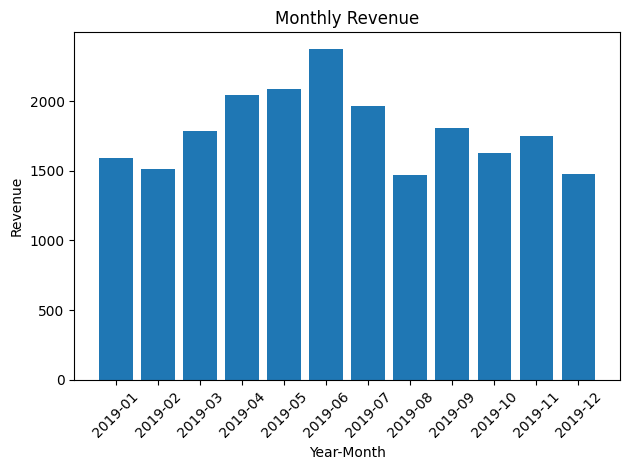

In [ ]:
plt.figure()
plt.bar(monthly_summary["year_month"], monthly_summary["revenue_sum"])
plt.title("Monthly Revenue")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

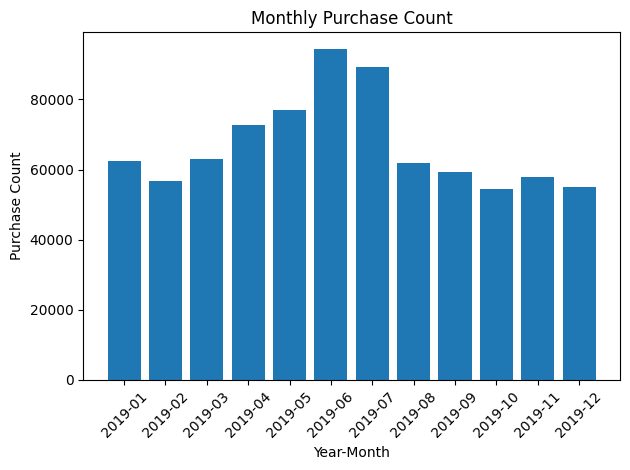

In [ ]:
plt.figure()
plt.bar(monthly_summary["year_month"], monthly_summary["purchase_cnt"])
plt.title("Monthly Purchase Count")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 채널별 매출 현황

In [ ]:
# 채널별 매출과 거래 수
channel_overview = (
    analysis_base
    .groupby("sales_channel_id")
    .agg(
        revenue_sum=("revenue", "sum"),
        transaction_cnt=("revenue", "count")
    )
)

channel_overview

# 총 거래 건수: 812,931
# offline은 247412건, 매출은 : 5637.23sek
# online은 565519건, 매출은: 16941.41sek
# 거래건수, 매출 모두 압도적으로 온라인이 많음


,revenue_sum,transaction_cnt
sales_channel_id,,
1,5547.886296,246592
2,15940.421345,557557


In [ ]:
# 채널 비중 계산
channel_ratio = channel_overview.copy()

channel_ratio["revenue_ratio"] = (
    channel_ratio["revenue_sum"]
    / channel_ratio["revenue_sum"].sum()
)

channel_ratio["transaction_ratio"] = (
    channel_ratio["transaction_cnt"]
    / channel_ratio["transaction_cnt"].sum()
)


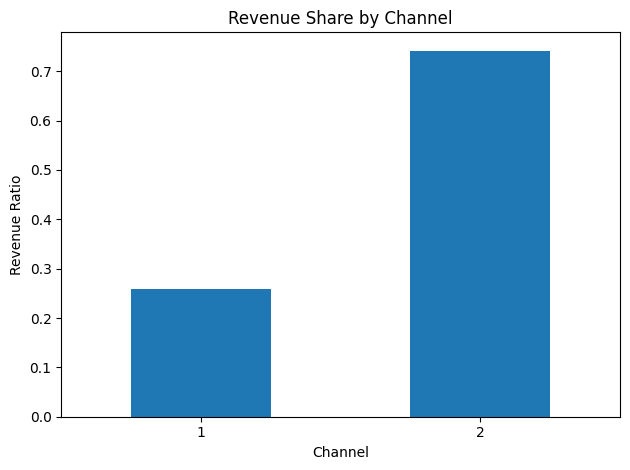

,revenue_sum,transaction_cnt,revenue_ratio,transaction_ratio
sales_channel_id,,,,
1,5547.886296,246592,0.258182,0.30665
2,15940.421345,557557,0.741818,0.69335


In [ ]:
# 시각화

channel_ratio["revenue_ratio"].plot(kind="bar")
plt.title("Revenue Share by Channel")
plt.xlabel("Channel")
plt.ylabel("Revenue Ratio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

channel_ratio

온라인 채널
- 매출 비중: 약 74.1%
- 거래 비중: 약 69.3%

오프라인 채널
- 매출 비중: 약 25.8%
- 거래 비중: 약 30.6%

> 이를 시각화한 결과, 온라인 채널이 전체 매출에서 차지하는 비중이 오프라인 채널보다 크게 나타났습니다.

온라인 채널은 거래 비중 대비 매출 비중이 더 높게 나타났으며, 이는 온라인 채널에서의 평균 거래 금액이 오프라인 채널보다 더 높은 경향을 보이는것을 의미합니다. <br>
반면에 오프라인 채널은 거래 비중 대비 매출 기여도가 상대적으로 낮은편으로, 예측컨데 비교적 저가 상품중심의 구매가 이루어졌을 가능성이 존재합니다.

> 매출구조는 제대로 파악할수 없기 때문에 상대적인 경향성 파악에 초점을 둔 해석입니다. <br> 현실과의 어느정도 차이를 보일순 있으나, 경향성을 가짐에는 변함없습니다.

### 상품군별 매출 현황

In [ ]:
# 의류 그룹 (상의, 하의, 아우터 등)
garment_overview = (
    analysis_base
    .groupby("garment_group_info", as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),
        transaction_cnt=("revenue", "count")
    )
    .sort_values("revenue_sum", ascending=False)
)

garment_overview.head(10)


,garment_group_info,revenue_sum,transaction_cnt
6,Jersey Fancy (1005),3000.115213,129950
16,Trousers (1009),2587.752727,74772
3,Dresses Ladies (1013),2042.560471,57167
7,Knitwear (1003),1881.267150,61270
1,Blouses (1010),1764.300729,64616
15,Swimwear (1018),1530.969164,68150
18,"Under-, Nightwear (1017)",1505.981707,72143
17,Trousers Denim (1016),1297.096133,32826
5,Jersey Basic (1002),1225.975387,80263
8,Outdoor (1007),821.447271,14856


In [ ]:
garment_overview["revenue_ratio"] = (
    garment_overview["revenue_sum"]
    / garment_overview["revenue_sum"].sum()
)

garment_overview["transaction_ratio"] = (
    garment_overview["transaction_cnt"]
    / garment_overview["transaction_cnt"].sum()
)

garment_overview.head(10)

# revenue_sum: 총매출
# transaction_cnt: 구매횟수
# revenue_ratio: 전체 매출 중에서 해당 상품군이 차지하는 매출 비중
# transaction_ratio: 전체 거래 중에서 해당 상품군이 차지하는 구매 횟수(거래) 비중

,garment_group_info,revenue_sum,transaction_cnt,revenue_ratio,transaction_ratio
6,Jersey Fancy (1005),3000.115213,129950,0.139616,0.161599
16,Trousers (1009),2587.752727,74772,0.120426,0.092983
3,Dresses Ladies (1013),2042.560471,57167,0.095055,0.071090
7,Knitwear (1003),1881.267150,61270,0.087548,0.076192
1,Blouses (1010),1764.300729,64616,0.082105,0.080353
15,Swimwear (1018),1530.969164,68150,0.071247,0.084748
18,"Under-, Nightwear (1017)",1505.981707,72143,0.070084,0.089713
17,Trousers Denim (1016),1297.096133,32826,0.060363,0.040821
5,Jersey Basic (1002),1225.975387,80263,0.057053,0.099811
8,Outdoor (1007),821.447271,14856,0.038228,0.018474


상위 상품군만 추려보면
- Jersey Fancy: 매출 비중 약 13.4%
- Trousers: 매출 비중 약 11.6%
- Dresses Ladies: 매출 비중 약 9.3%
- Knitwear: 매출 비중 약 8.7%
- Blouses: 매출 비중 약 8.0%

서비스의 주요 매출을 견인하는 핵심 상품군이라 볼수 있다.

- Trousers, Dresses Ladies, Outdoor 상품군은 거래 비중보다 매출 비중이 높아 상대적으로 평균 구매 금액이 높은 상품군으로 해석할 수 있다.

- Jersey Basic, Under-, Nightwear, Swimwear 상품군은 거래 비중 대비 매출 비중이 낮아 비교적 단가가 낮고 자주 구매되는 상품군의 특성을 보인다.

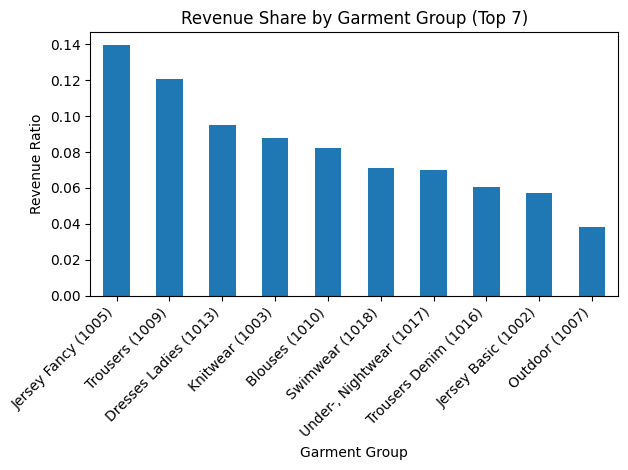

In [ ]:
# 가장 판매량이 많은 7개 항목만 출력
top_garments = garment_overview.head(10)

import matplotlib.pyplot as plt

top_garments.set_index("garment_group_info")["revenue_ratio"].plot(kind="bar")
plt.title("Revenue Share by Garment Group (Top 7)")
plt.xlabel("Garment Group")
plt.ylabel("Revenue Ratio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


상품군별 매출 비중을 막대그래프로 시각화한 결과, 매출이 특정 상품군에 고르게 분포되어 있기보다는 상위 상품군에 집중되는 구조임을 확인할 수 있다.

- 매출은 Jersey 계열, 바지, 원피스 등 주요 의류 상품군을 중심으로 형성되어 있다.
- 일부 상품군은 거래 대비 매출 기여도가 높아 상대적으로 고가 상품군의 특성을 보인다.
- 반대로 기본 의류 상품군은 거래 빈도는 높으나 매출 기여도는 상대적으로 낮다.


> 상품군별 매출 분포를 기준으로 한 결과로, 공급량, 가격 정책, 이밴트(프로모션?) 등 외부 요인은 반영되지 않았습니다.

### 고객특성별 매출 현황

In [ ]:
# 멤버십 상태별 매출
member_overview = (
    analysis_base
    .groupby("club_member_status", as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),
        transaction_cnt=("revenue", "count"),
        customer_cnt=("customer_id", "nunique")
    )
)

member_overview["revenue_ratio"] = (
    member_overview["revenue_sum"]
    / member_overview["revenue_sum"].sum()
)

member_overview


,club_member_status,revenue_sum,transaction_cnt,customer_cnt,revenue_ratio
0,Active,21004.532083,787503,340069,0.977487
1,Left Club,7.415068,257,111,0.000345
2,Pre-Create,476.360490,16389,11323,0.022168


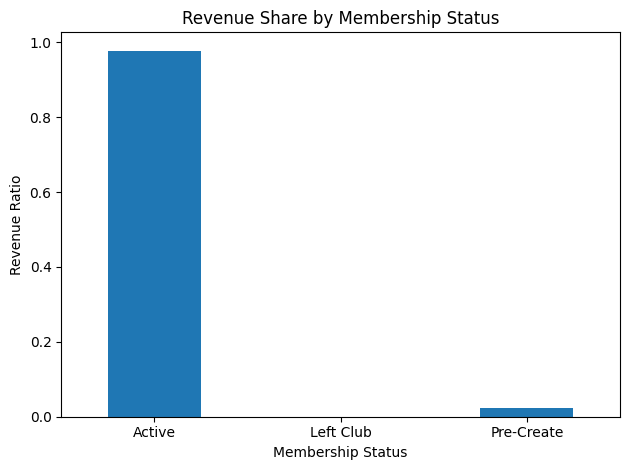

In [ ]:
import matplotlib.pyplot as plt

member_overview.set_index("club_member_status")["revenue_ratio"].plot(kind="bar")
plt.title("Revenue Share by Membership Status")
plt.xlabel("Membership Status")
plt.ylabel("Revenue Ratio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


멤버십 상태별 매출을 분석한 결과, ACTIVE 멤버십 고객이 전체 매출의 약 97.7%를 차지하는 것으로 나타났다.<br>
반면, PRE-CREATE 고객은 약 2.2%, LEFT CLUB 고객은 매우 미미한 수준의 매출 비중을 보였다.<br>
즉, 이는 현재 활성화된 멤버십 고객이 서비스 매출의 핵심 고객군임을 보여준다.

> 다만, 멤버십 상태가 매출의 직접적인 원인임을 의미하지 않으며 구매 활동이 활발한 고객이 멤버십을 유지하고 있을 가능성이 있기 때문에 큰 의미가 있다 볼순 없다

In [ ]:
# 뉴스 구독(FN) 여부별 매출
fn_overview = (
    analysis_base
    .groupby("FN", as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),
        transaction_cnt=("revenue", "count"),
        customer_cnt=("customer_id", "nunique")
    )
)

fn_overview["revenue_ratio"] = (
    fn_overview["revenue_sum"]
    / fn_overview["revenue_sum"].sum()
)

fn_overview

,FN,revenue_sum,transaction_cnt,customer_cnt,revenue_ratio
0,False,12283.287928,456165,208220,0.571627
1,True,9205.019714,347984,143283,0.428373


뉴스레터 수신 여부에 따른 매출을 분석한 결과, 뉴스를 수신하지 않는 고객이 약 57.1%, 뉴스를 수신하는 고객이 약 42.9%의 매출 비중을 차지하는것을 확인하였다. <br>

> 뉴스레터 수신 여부에 따라 매출 규모 차이가 관찰되었으나, 이는 고객 수 차이에 따른 결과일 가능성이 있다.

In [ ]:
# Active 여부별 매출
active_overview = (
    analysis_base
    .groupby("Active", as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),
        transaction_cnt=("revenue", "count"),
        customer_cnt=("customer_id", "nunique")
    )
)

active_overview["revenue_ratio"] = (
    active_overview["revenue_sum"]
    / active_overview["revenue_sum"].sum()
)

active_overview


,Active,revenue_sum,transaction_cnt,customer_cnt,revenue_ratio
0,False,12402.680368,460828,210476,0.577183
1,True,9085.627273,343321,141027,0.422817


고객의 활동 상태(Active 여부)에 따른 매출을 분석한 결과, 비활성(False) 고객이 약 57.7%, 활성(True) 고객이 약 42.3%의 매출 비중을 차지했다. Active 고객은 고객 수 대비 상대적으로 높은 매출 기여도를 보이는 경향이 있다.

> Active 변수는 고객의 최근 활동 여부를 나타내는 상태 정보로, 매출의 원인보다는 현재 고객 특성을 설명하는 지표로 해석하였다.

### 상위 하위 20% 비중/고객 등급별 매출 분포

In [ ]:
revenue_by_group = (
    analysis_base
    .groupby("revenue_group")
    .agg(
        revenue_sum=("revenue", "sum"),
        transaction_cnt=("revenue", "count")
    )
)

revenue_by_group

,revenue_sum,transaction_cnt
revenue_group,,
bottom_20,889.174958,73566
middle,9203.948886,359546
top_20,11395.183797,371037


In [ ]:
# 비중
revenue_by_group["revenue_ratio"] = (
    revenue_by_group["revenue_sum"]
    / revenue_by_group["revenue_sum"].sum()
)

revenue_by_group

,revenue_sum,transaction_cnt,revenue_ratio
revenue_group,,,
bottom_20,889.174958,73566,0.041379
middle,9203.948886,359546,0.428324
top_20,11395.183797,371037,0.530297


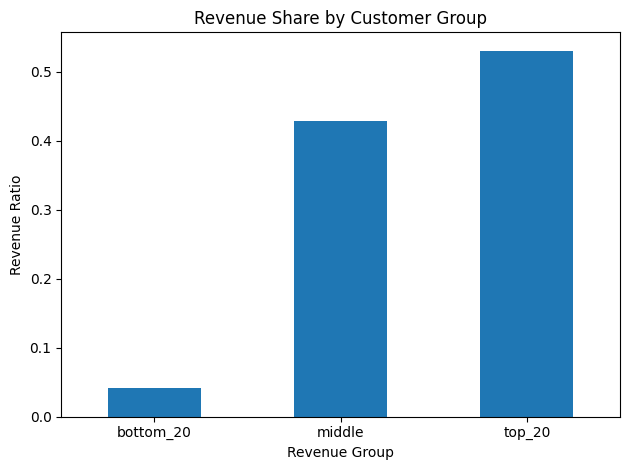

In [ ]:
import matplotlib.pyplot as plt

revenue_by_group["revenue_ratio"].plot(kind="bar")
plt.title("Revenue Share by Customer Group")
plt.xlabel("Revenue Group")
plt.ylabel("Revenue Ratio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


상위 20% 고객들은 거래를 더 자주 하기 때문에 고객 수는 20%여도, 거래 행에서는 45% 정도<br>
반면 하위 20% 고객은 거래 횟수와 매출 기여도 모두 낮은 수준을 보였다.

> 거래 기준 분포에서 상위 고객군(top_20)이 전체 거래의 약 46%를 차지하였다. 이는 상위 고객군이 평균적으로 더 빈번하게 구매하는 경향이 있음을 시사한다.

> 매출 금액은 데이터 전처리 과정에서 스케일이 변형되었을 가능성이 있어 절대값 해석보다는 그룹 간 상대 비교에 초점을 맞추었다.

### 상위 하위 20% 채널 분석

In [ ]:
channel_summary = (
    analysis_base
    .groupby(["revenue_group", "sales_channel_id"], as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),
        purchase_cnt=("revenue", "count")
    )
)


channel_summary

,revenue_group,sales_channel_id,revenue_sum,purchase_cnt
0,bottom_20,1,417.273167,36844
1,bottom_20,2,471.901792,36722
2,middle,1,3146.290285,134626
3,middle,2,6057.658601,224920
4,top_20,1,1984.322845,75122
5,top_20,2,9410.860952,295915


상위 20% 고객은 온라인 채널에서의 매출 비중이 상대적으로 높게 나타났으며, 하위 20% 고객은 채널 간 매출 차이가 크지 않다.

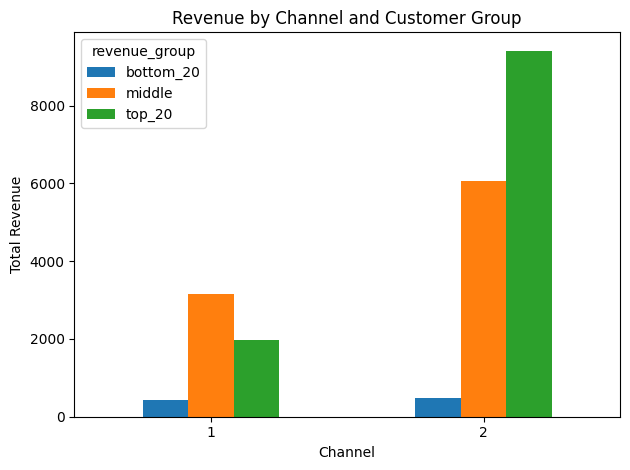

In [ ]:
# 매출 기준 채널 비교 (가장 중요)

pivot_channel_rev = channel_summary.pivot(
    index="sales_channel_id",
    columns="revenue_group",
    values="revenue_sum"
)

pivot_channel_rev.plot(kind="bar")
plt.title("Revenue by Channel and Customer Group")
plt.xlabel("Channel")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


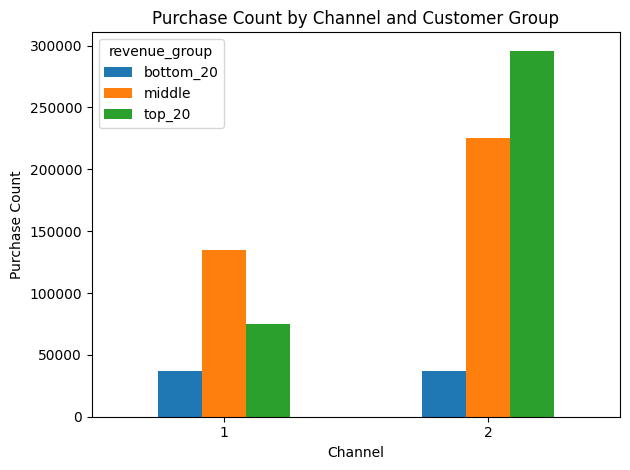

In [ ]:
# 구매 횟수 기준 채널 비교

pivot_channel_cnt = channel_summary.pivot(
    index="sales_channel_id",
    columns="revenue_group",
    values="purchase_cnt"
)

pivot_channel_cnt.plot(kind="bar")
plt.title("Purchase Count by Channel and Customer Group")
plt.xlabel("Channel")
plt.ylabel("Purchase Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


고객 매출 등급과 채널을 함께 분석한 결과, 상위 20% 고객은 온라인 채널에서의 매출과 구매 횟수가 모두 높게 나타났다. <br>반면 하위 20% 고객은 채널별 매출 및 구매 활동이 전반적으로 낮은 수준을 보였다.

> 이는 상위 고객이 온라인 채널을 주요 구매 채널로 활용하고 있을 가능성을 시사하며, 채널 접근성과 구매 편의성이 매출 규모 차이에 영향을 미쳤을 수 있다.

> 다만 본 분석은 관찰된 패턴을 기반으로 분석한것으로, 채널 이용이 매출 증가의 직접적인 원인임을 의미하지는 않는다.

#### 
상위 20%:
- 온라인 채널 중심 구매
- 거래 횟수와 매출 모두 높음

하위 20%:
- 구매 빈도 자체가 낮음

### 상위 하위 20% 상품군 분석

In [ ]:
# 상품군 분석
garment_summary = (
    analysis_base
    .groupby(["revenue_group", "garment_group_info"], as_index=False)
    .agg(
        revenue_sum=("revenue", "sum")
    )
)

In [ ]:
top_garments = (
    garment_summary
    .groupby("garment_group_info")["revenue_sum"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

garment_top = garment_summary[
    garment_summary["garment_group_info"].isin(top_garments)
]

garment_top

,revenue_group,garment_group_info,revenue_sum
1,bottom_20,Blouses (1010),45.841118
3,bottom_20,Dresses Ladies (1013),23.356017
5,bottom_20,Jersey Basic (1002),157.996863
6,bottom_20,Jersey Fancy (1005),181.716795
7,bottom_20,Knitwear (1003),45.571186
8,bottom_20,Outdoor (1007),1.388593
15,bottom_20,Swimwear (1018),89.372846
16,bottom_20,Trousers (1009),25.275983
17,bottom_20,Trousers Denim (1016),21.529898
18,bottom_20,"Under-, Nightwear (1017)",111.161897


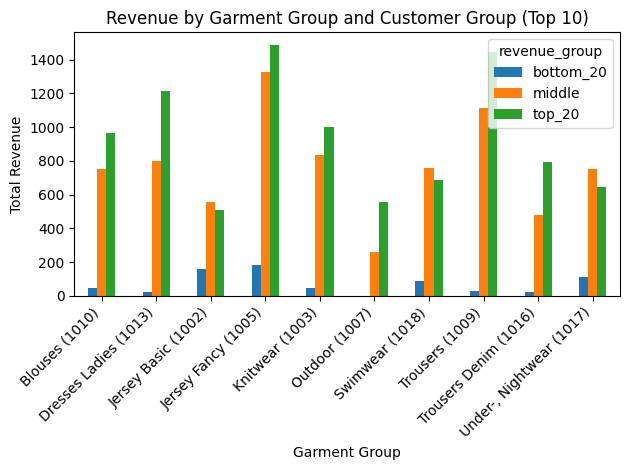

In [ ]:
# 상품군 × 고객등급 매출 비교
pivot_garment = garment_top.pivot(
    index="garment_group_info",
    columns="revenue_group",
    values="revenue_sum"
)


pivot_garment.plot(kind="bar")
plt.title("Revenue by Garment Group and Customer Group (Top 10)")
plt.xlabel("Garment Group")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


상위 20% 고객과 하위 20% 고객 간 상품군별 매출 구조에는 뚜렷한 차이가 관찰되었다.

상위 10개 주요 의류 상품군 전반에서 고르게 높은 매출을 기록했다.<br>
특히 Jersey Fancy, Trousers, Dresses Ladies, Outdoor 등에서 매출 기여도가 높게 나타났다.<br>
이는 상위 고객이 특정 상품군에 국한되지 않고 다양한 의류 상품군을 폭넓게 구매하는 경향을 보임을 의미한다.

---
상위 20%:
- 다양한 상품군 구매
- 외출용·선택적 상품군(바지, 원피스, 아우터 등)까지 확장
---

하위 20% 고객은 Jersey Basic, Under-, Nightwear 등 기본 의류 상품군에 매출이 집중되어있다.<br>
외출용·선택적 상품군(원피스, 바지, 아우터 등)에서는 매출이 매우 낮은 수준에 머물러있다.<br>
전반적으로 구매 범위가 제한적인 소비 패턴을 보인다.

---
하위 20%:
- 기본 의류(Jersey Basic, Under-, Nightwear)에 집중
- 구매 범위가 좁음
---

상위 20% 고객은 특정 의류 상품군에 매출이 집중되는 경향을 보이는 반면, 하위 20% 고객은 기본 상품군 위주의 구매 패턴을 보인다.

중간 고객은 상위·하위 고객군 사이에서
- 대부분의 상품군에서 매출 규모가 중간 수준을 유지
- 상·하위 고객의 소비 패턴을 연결하는 완충 역할을 수행

이는 중간 고객이 상위 고객으로 전환될 가능성이 있는 핵심 전환 대상임을 시사한다.

## 특정월에(시즌 중)에 악세사리가 많이 팔리나?

In [ ]:
analysis_base["product_group_name"].value_counts()

product_group_name
Garment Upper body       316453
Garment Lower body       179556
Garment Full body         89818
Swimwear                  69611
Underwear                 62449
Accessories               40473
Shoes                     19155
Socks & Tights            16386
Nightwear                  8775
Unknown                    1151
Bags                        172
Items                        85
Furniture                    26
Cosmetic                     24
Underwear/nightwear          11
Garment and Shoe care         4
Name: count, dtype: int64

In [ ]:
analysis_master[
    analysis_master["product_group_name"].str.contains("access", case=False, na=False)
]["product_type_info"].value_counts()

product_type_info
Bag (66)                  5830
Belt (67)                 4948
Earring (70)              4560
Scarf (80)                3924
Sunglasses (81)           3542
Necklace (77)             3291
Hair/alice band (74)      2361
Other accessories (78)    2116
Hat/beanie (75)           2056
Hair ties (512)           1208
Hair clip (72)            1006
Hair string (73)           936
Ring (79)                  873
Gloves (71)                780
Cap/peaked (69)            733
Hat/brim (76)              689
Bracelet (68)              253
Earrings (508)             225
Watch (85)                 172
Beanie (496)               160
Dog Wear (231)             152
Tie (82)                   149
Wallet (84)                130
Hairband (511)              59
Waterbottle (156)           57
Braces (499)                53
Umbrella (83)               36
Straw hat (515)             33
Soft Toys (155)             30
Bucket hat (503)            27
Cap (504)                   24
Felt hat (509)       

In [ ]:
acc_month = (
    analysis_master[
        analysis_master["product_group_name"].str.contains("access", case=False, na=False)
    ]
    .groupby("year_month", as_index=False)
    .agg(revenue_sum=("revenue", "sum"))
)

acc_month

,year_month,revenue_sum
0,2019-01,50.831322
1,2019-02,48.294203
2,2019-03,47.927254
3,2019-04,50.711508
4,2019-05,53.500169
5,2019-06,50.527305
6,2019-07,52.408627
7,2019-08,44.337678
8,2019-09,52.945932
9,2019-10,54.575119


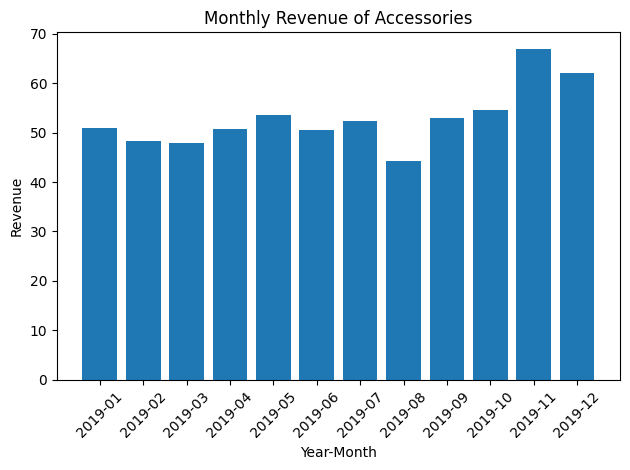

In [ ]:
plt.figure()
plt.bar(acc_month["year_month"], acc_month["revenue_sum"])
plt.title("Monthly Revenue of Accessories")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 학기 시작 전에 옷 구매량
- 스웨덴의 가을학기(8~9) 봄학기 (1월)
- 학기 직전을 1개월(7월 12월)~ 2개월 (6월/11월)

In [ ]:
youth_clothes = analysis_master[
    (analysis_master["age_group"].isin(["10s", "20s"])) &
    (analysis_master["product_group_name"].str.contains("Garment", case=False, na=False))
].copy()

youth_clothes["month"] = youth_clothes["year_month"].str[-2:].astype(int)


In [ ]:
monthly_purchase_cnt = (
    youth_clothes
    .groupby("year_month", as_index=False)
    .agg(
        purchase_cnt=("revenue", "count")
    )
    .sort_values("year_month")
)

monthly_purchase_cnt


,year_month,purchase_cnt
0,2019-01,17261
1,2019-02,16099
2,2019-03,17559
3,2019-04,19620
4,2019-05,20885
5,2019-06,27244
6,2019-07,27178
7,2019-08,19702
8,2019-09,20077
9,2019-10,18097


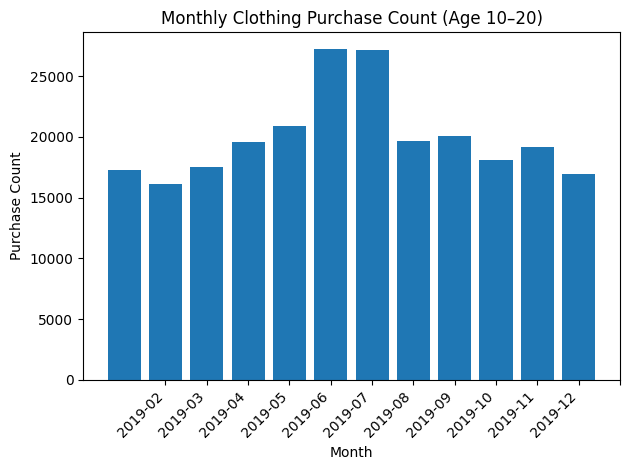

In [ ]:
plt.figure()
plt.bar(monthly_purchase_cnt["year_month"], monthly_purchase_cnt["purchase_cnt"])
plt.title("Monthly Clothing Purchase Count (Age 10–20)")
plt.xlabel("Month")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Purchase Count")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


- 스웨덴의 가을학기(8~9) 봄학기 (1월)
- 학기 직전을 1개월(7월 12월)~ 2개월 (6월/11월)

#### 6~7월에 이상하리만큼 구매율이 높은 이유?

In [ ]:
youth_6_7 = analysis_master[
    (analysis_master["age_group"].isin(["10s", "20s"])) &
    (analysis_master["year_month"].str.endswith(("-06", "-07"))) &
    (analysis_master["product_group_name"].str.contains("Garment", case=False, na=False))
].copy()


In [ ]:
garment_6_7_summary = (
    youth_6_7
    .groupby("product_group_name", as_index=False)
    .agg(
        purchase_cnt=("revenue", "count")
    )
    .sort_values("purchase_cnt", ascending=False)
)

garment_6_7_summary.head(10)


,product_group_name,purchase_cnt
2,Garment Upper body,25907
1,Garment Lower body,17300
0,Garment Full body,11215


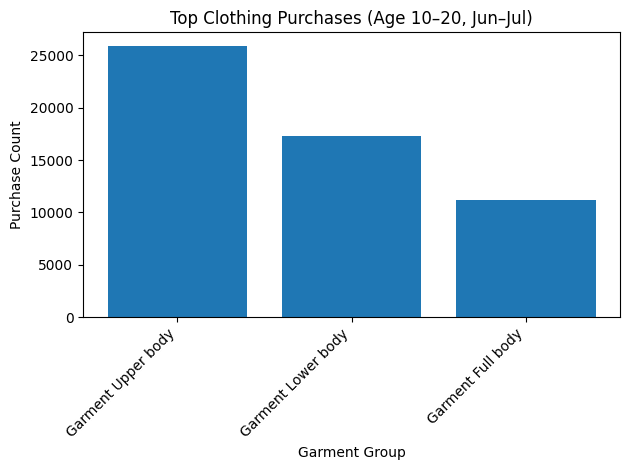

In [ ]:
import matplotlib.pyplot as plt

top10_garments = garment_6_7_summary.head(10)

plt.figure()
plt.bar(
    top10_garments["product_group_name"],
    top10_garments["purchase_cnt"]
)
plt.title("Top Clothing Purchases (Age 10–20, Jun–Jul)")
plt.xlabel("Garment Group")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 6월 판매량(수영복, 운동복)
스웨덴의
- 봄은 3,4월부터 5월까지
- 여름은 6월부터 8월까지, 
- 가을은 9월부터 10,11월, 
- 겨울은 11,12월부터 2,3월까지

In [ ]:
df = analysis_master.copy()

activewear = df[
    (df["product_group_name"] == "Swimwear") |
    (df["product_group_name"].str.contains("Outdoor|Sport|Active", case=False))
]


activewear_monthly = (
    activewear
    .groupby("year_month", as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),
        purchase_cnt=("revenue", "count")
    )
    .sort_values("year_month")
)

activewear_monthly



,year_month,revenue_sum,purchase_cnt
0,2019-01,98.206440,4285
1,2019-02,92.298016,3834
2,2019-03,143.288050,5710
3,2019-04,212.652559,8618
4,2019-05,268.892304,11265
5,2019-06,370.189762,14646
6,2019-07,260.950897,13088
7,2019-08,74.218068,4860
8,2019-09,19.521881,1120
9,2019-10,12.171373,730


In [ ]:
activewear_monthly.sort_values("revenue_sum", ascending=False).head(5)
# 매출순 비교

,year_month,revenue_sum,purchase_cnt
5,2019-06,370.189762,14646
4,2019-05,268.892304,11265
6,2019-07,260.950897,13088
3,2019-04,212.652559,8618
2,2019-03,143.288050,5710


In [ ]:
activewear_monthly.sort_values("purchase_cnt", ascending=False).head(5)
# 거래횟수 비교

,year_month,revenue_sum,purchase_cnt
5,2019-06,370.189762,14646
6,2019-07,260.950897,13088
4,2019-05,268.892304,11265
3,2019-04,212.652559,8618
2,2019-03,143.288050,5710


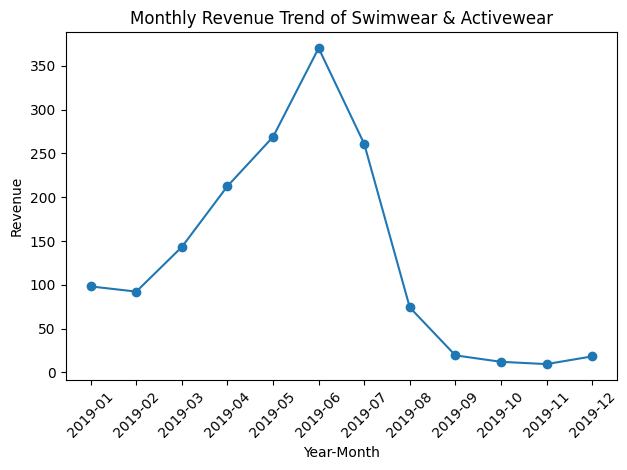

In [ ]:
plt.figure()
plt.plot(activewear_monthly["year_month"], activewear_monthly["revenue_sum"], marker="o")
plt.title("Monthly Revenue Trend of Swimwear & Activewear")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


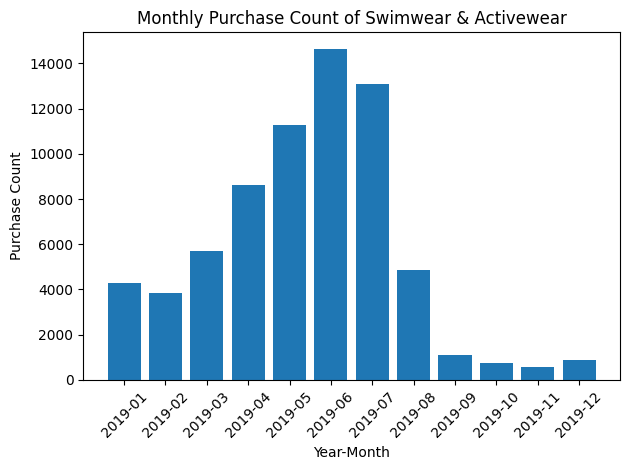

In [ ]:
plt.figure()
plt.bar(activewear_monthly["year_month"], activewear_monthly["purchase_cnt"])
plt.title("Monthly Purchase Count of Swimwear & Activewear")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5~7월 기간 동안 고객의 의류 구매 비중을 월별로 분석한 결과. <br>
전체 의류 구매량 증가와 함께 수영복 및 운동·아웃도어 의류의 구매 비중 변화가 관찰되었습니다.

#### 5~7월에 구매비중이 몰려있는데 그냥 이 시기에 구매력이 좋은게 아닌가?

In [ ]:
base = analysis_master[
    (analysis_master["age_group"].isin(["10s", "20s"])) &
    (analysis_master["year_month"].str.endswith(("-05", "-06", "-07"))) &
    (analysis_master["product_group_name"].str.contains("Garment", case=False, na=False))
].copy()

# 의류 유형 구분
base["wear_type"] = "Other Clothes"

base.loc[
    (base["product_group_name"] == "Swimwear") |
    (base["product_group_name"].str.contains("Outdoor|Sport|Active", case=False, na=False)),
    "wear_type"
] = "Swimwear & Activewear" # 수영복과 운동복

# 월 × 의류유형 구매 횟수 집계
wear_month_cnt = (
    base
    .groupby(["year_month", "wear_type"], as_index=False)
    .agg(purchase_cnt=("revenue", "count"))
)


In [ ]:
# 구매비중
wear_month_cnt["purchase_ratio"] = (
    wear_month_cnt["purchase_cnt"]
    / wear_month_cnt.groupby("year_month")["purchase_cnt"].transform("sum")
)

wear_ratio_table = wear_month_cnt.pivot(
    index="year_month",
    columns="wear_type",
    values="purchase_ratio"
)

wear_ratio_table



wear_type,Other Clothes
year_month,
2019-05,1.0
2019-06,1.0
2019-07,1.0


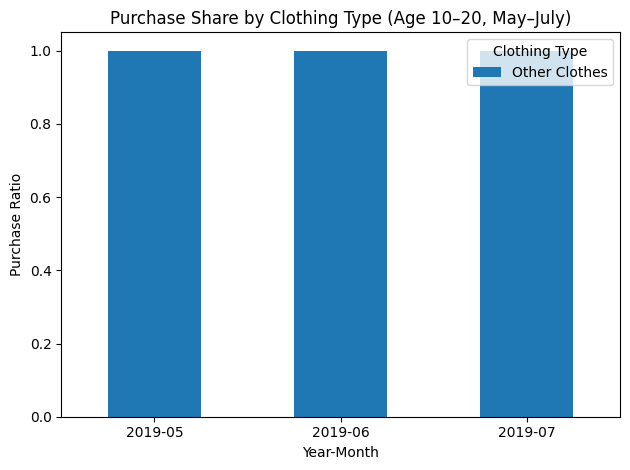

In [ ]:
wear_ratio_table.plot(kind="bar", stacked=True)
plt.title("Purchase Share by Clothing Type (Age 10–20, May–July)")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Ratio")
plt.xticks(rotation=0)
plt.legend(title="Clothing Type")
plt.tight_layout()
plt.show()